In [10]:
import numpy as np
from fft_tdse_simulator.simulator import *
from fft_tdse_simulator.animator import *
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from math import erf
from icecream import ic

In [30]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def sturm_liouville_eq(y, x, lmbda, p, q, w):
    u, v = y
    dydx = [v, (lmbda * w(x) - q(x)) * u / p(x)]
    return dydx

def sl_pruefer(theta, x, ell, q):
    g = 2*q(x) - ell
    return -np.sin(theta)**2 + g*np.cos(theta)**2



def integrate_prufer(x_values, lmbda, p, q, w):
    # Initial conditions for Prüfer transformation
    initial_conditions_prufer = [0, 1, 0, 0]  # u(0) = 0, u'(0) = 1, alpha(0) = 0, beta(0) = 0

    # Integrate the Prüfer transformation equations
    solution_prufer = odeint(prufer_transform, initial_conditions_prufer, x_values, args=(lmbda, p, q, w))

    # Extract the Prüfer angles
    alpha_values = solution_prufer[:, 2]
    beta_values = solution_prufer[:, 3]

    return alpha_values, beta_values

def shooting_method(lmbda_guess, x_span, num_points, p, q, w, tolerance=1e-6, max_iterations=100):
    x_values = np.linspace(x_span[0], x_span[1], num_points)

    # Bisection loop with a tolerance check
    lmbda_lower = 0
    lmbda_upper = lmbda_guess
    iteration = 0

    while iteration < max_iterations:
        # Integrate the Prüfer transformation equations for the current guess
        alpha_values, beta_values = integrate_prufer(x_values, lmbda_guess, p, q, w)

        # Check the boundary condition (e.g., adjust as needed)
        boundary_condition = alpha_values[-1] - np.pi / 2

        if abs(boundary_condition) < tolerance:
            break  # Convergence achieved

        # Adjust the bounds based on the sign of the boundary condition
        if boundary_condition * integrate_prufer(x_values, lmbda_upper, p, q, w)[0][-1] > 0:
            lmbda_upper *= 2
        else:
            lmbda_lower = lmbda_guess

        # Update the guess using bisection
        lmbda_guess = 0.5 * (lmbda_lower + lmbda_upper)

        iteration += 1

    return lmbda_guess

def main():
    # Define Sturm-Liouville coefficients as functions of x
    p = lambda x: 1  # Change as needed
    q = lambda x: 0  # Change as needed
    w = lambda x: 1  # Change as needed

    # Define the interval and number of points
    x_span = [0, 1]
    num_points = 1000

    # Initial guess for eigenvalue
    lmbda_guess = 1.0

    # Find the eigenvalue using the shooting method with Prüfer transformation
    eigenvalue = shooting_method(lmbda_guess, x_span, num_points, p, q, w)

    print(f"The estimated eigenvalue is: {eigenvalue}")

main()


/var/folders/qc/b2y8zg713_x554g8ykkcbcbh0000gp/T/ipykernel_55313/3662468728.py:47: RuntimeWarning: overflow encountered in scalar multiply
  if boundary_condition * integrate_prufer(x_values, lmbda_upper, p, q, w)[0][-1] > 0:
/var/folders/qc/b2y8zg713_x554g8ykkcbcbh0000gp/T/ipykernel_55313/3662468728.py:12: RuntimeWarning: overflow encountered in scalar power
  dydx = [v, (lmbda * w(x) - q(x)) * u / p(x), -u**2, -v**2]
/Users/simenkva/anaconda3/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.9829829829830D+00
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.9821726654260D+00   r2 =  0.9821726654260D+00
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.9839839839840D+00
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.9821726654260D+00   r2 =  0.9821726654260D+00
 lsoda--  trouble from intdy. itask = i1, tout = r1  
      in above message,  i1 =         1
      in above message,  r1 =  0.9839839839840D+00
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.9829829829830D+00
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.9821726654260D+00   r2 =  0.9821726654260D+00
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.9839839839840D+00
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.9821726654260D+00   r2 =  0.9

 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.1741741741742D+00
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.1736252456759D+00   r2 =  0.1736252456759D+00
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.1751751751752D+00
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.1736252456759D+00   r2 =  0.1736252456759D+00
 lsoda--  trouble from intdy. itask = i1, tout = r1  
      in above message,  i1 =         1
      in above message,  r1 =  0.1751751751752D+00
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.1741741741742D+00
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.1740594070995D+00   r2 =  0.1740594070995D+00
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.1751751751752D+00
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.1740594070995D+00   r2 =  0.1

 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.8708708708709D-01
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.8681260997474D-01   r2 =  0.8681260997474D-01
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.8808808808809D-01
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.8681260997474D-01   r2 =  0.8681260997474D-01
 lsoda--  trouble from intdy. itask = i1, tout = r1  
      in above message,  i1 =         1
      in above message,  r1 =  0.8808808808809D-01
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.9009009009009D-01
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.8970653742461D-01   r2 =  0.8970653742461D-01
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.9109109109109D-01
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.8970653742461D-01   r2 =  0.8

 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.3203203203203D-01
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.3145495602067D-01   r2 =  0.3145495602067D-01
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.3303303303303D-01
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.3145495602067D-01   r2 =  0.3145495602067D-01
 lsoda--  trouble from intdy. itask = i1, tout = r1  
      in above message,  i1 =         1
      in above message,  r1 =  0.3303303303303D-01
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.3103103103103D-01
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.3069289420167D-01   r2 =  0.3069289420167D-01
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.3203203203203D-01
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.3069289420167D-01   r2 =  0.3

/Users/simenkva/anaconda3/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [64]:
x_min = -40
x_max = 40
nx = 512



𝜇 = 1.0
𝑐 = 0.923+1.568*𝜇
𝛼 = 0.2411+1.405*𝜇

def fun(x, y, z):


    r2 = (x*x+y*y+z*z)
    r = r2**.5
    
    if r == 0:
        V0 = 𝜇
    else:
        V0 = erf(𝜇*r)/r
        
    return V0


    
def potential(x, y):

    z = 0
    
    r2 = (x*x+y*y+z*z)
    r = r2**.5

    V0 = np.vectorize(fun)(x, y, z)
        
    V = V0 + 𝑐*np.exp(-𝛼**2*r2)
    return -V


def guess(x, y):
    #return np.exp(-(x*x + y*y + z+z)/2)
    y0 = 5
    k0 = 0
    sigma0 = 2
    r2 = (x*x+(y-y0)*(y-y0))

    return np.exp(-r2/(2*sigma0)) * np.exp(-1j*k0*y)
          
    #return np.exp(-r2**.5)

In [52]:
sim = Simulator(verbose=True)
sim.set_dimension(2)
sim.set_mass(1.0)
sim.set_charge(-1.0)
sim.set_initial_condition(guess)
sim.set_potential(potential)
sim.set_grid([x_min, x_min], [x_max, x_max], [nx, nx])

ic| message: 'Dimension set to 2'
ic| message: 'Initial condition set.'
ic| self.initial_psi_fun: <function guess at 0x2b05f37f0>


In [65]:
sim.set_time_parameters(0.0, 20.0, 2000)

ic| 'Time grid:'
ic| self.t0: 0.0, self.t1: 20.0, self.n_steps: 2000


In [66]:
sim.prepare()

ic| hasattr(self, 'gs'): False


In [67]:
V = sim.ham.V
psi0 = sim.wf.psi.copy()


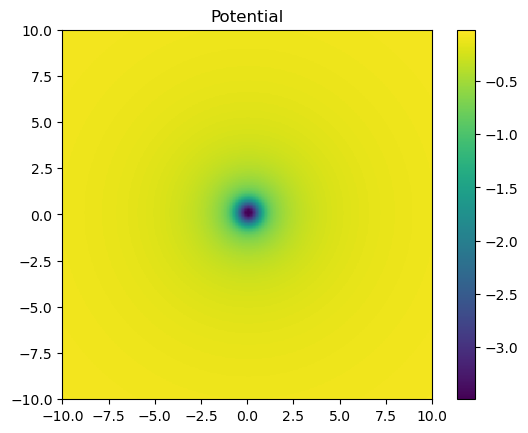

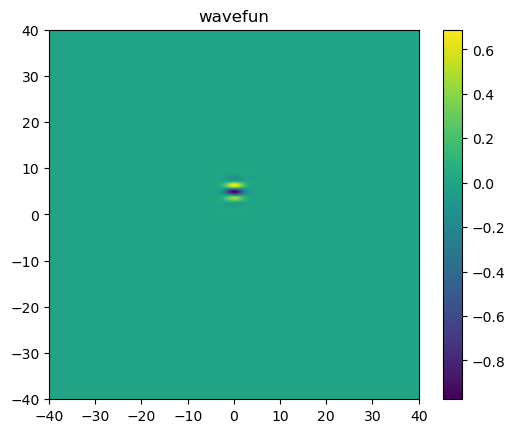

In [68]:
plt.figure()
plt.imshow(V.T, extent = [x_min, x_max, x_min, x_max], origin='lower')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.colorbar()
plt.title('Potential')
plt.show()

plt.figure()
plt.imshow(psi0.real.T, extent = [x_min, x_max, x_min, x_max], origin='lower')
# plt.xlim(-10,10)
# plt.ylim(-10,10)
plt.colorbar()
plt.title('wavefun')
plt.show()

ic| hasattr(self, 'gs'): False
ic| self.format: './frames/frame%05d.png'
ic| 'Running simulation...'


  0%|          | 0/2000 [00:00<?, ?it/s]

ic| len(self.frame_list): 201
ffmpeg version N-111795-g95433eb3aa-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxml2 --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvb

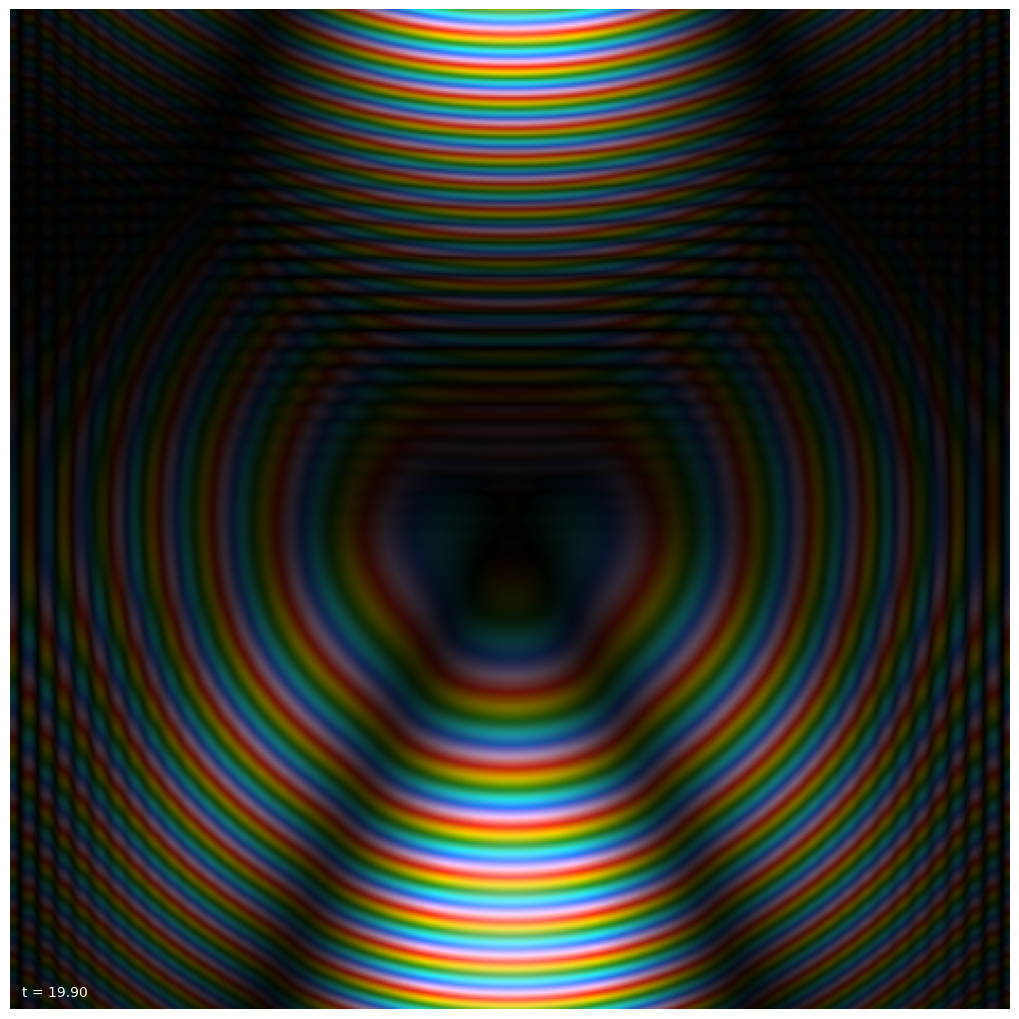

In [69]:
sim.prepare()

anim1 = Animator2d(sim, folder='./frames/')
anim1.vis_type = 'complex'
anim1.show_axis = False
#anim1.xlim = [-40, 40]
#anim1.ylim = [-40, 40]
anim1.mag_map = lambda r: r
anim1.set_interval(10)
anim1.set_framesize(1024, 1024)

# initialize figure, and add potential visualization
anim1.init_figure()


anim_callback1 = anim1.get_callback()
#anim1.caption_format = 't = {sim.t:.02f}, P_ionized = {sim.P_ionized}'

def callback(sim):
#    psi_out = np.where((np.abs(sim.x) > 40) | (np.abs(sim.y) > 40), sim.psi, np.zeros_like(sim.psi))
#    P_hist[sim.t_index] = np.sum(np.abs(psi_out)**2) * sim.grid.dtau
#    sim.P_ionized = P_hist[sim.t_index]
    anim_callback1(sim)
    
    
sim.simulate(callback=callback)
anim1.make_movie("2d_h.mp4")
anim1.clean_frames()


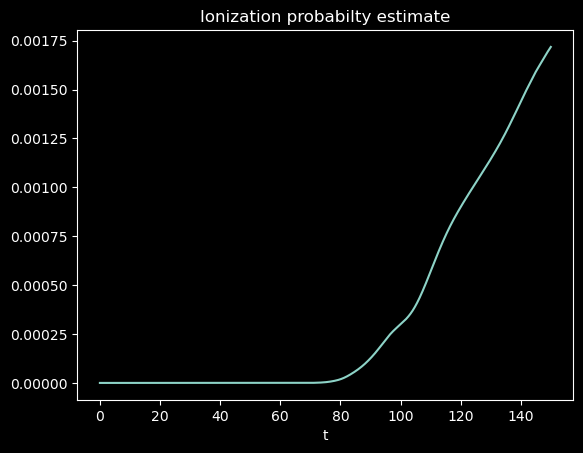

In [37]:
plt.figure()
plt.plot(sim.t_grid[:-1], P_hist[:-1])
plt.title('Ionization probabilty estimate')
plt.xlabel('t')
plt.show()

In [ ]:
sim.ham.D

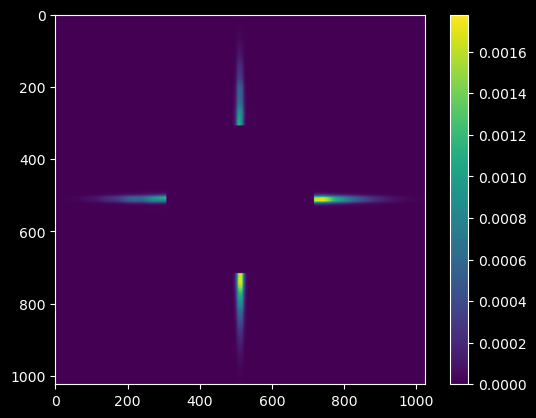

In [27]:
psi_out = np.where((np.abs(sim.x) > 40) | (np.abs(sim.y) > 40), sim.psi, np.zeros_like(sim.psi))
plt.figure()

plt.imshow(np.abs(psi_out))
plt.colorbar()

In [11]:
help(np.where)

Help on _ArrayFunctionDispatcher in module numpy:

where(...)
    where(condition, [x, y], /)
    
    Return elements chosen from `x` or `y` depending on `condition`.
    
    .. note::
        When only `condition` is provided, this function is a shorthand for
        ``np.asarray(condition).nonzero()``. Using `nonzero` directly should be
        preferred, as it behaves correctly for subclasses. The rest of this
        documentation covers only the case where all three arguments are
        provided.
    
    Parameters
    ----------
    condition : array_like, bool
        Where True, yield `x`, otherwise yield `y`.
    x, y : array_like
        Values from which to choose. `x`, `y` and `condition` need to be
        broadcastable to some shape.
    
    Returns
    -------
    out : ndarray
        An array with elements from `x` where `condition` is True, and elements
        from `y` elsewhere.
    
    See Also
    --------
    choose
    nonzero : The function that is called